# Big Data Processes - exercise no. 6
# <font color= green>Regression</font>

### 1. Importing various libraries

There are two was to import a library. Either import the whole package by **import library_name**, but it may take time. If you know exactly what part (class) of the package you need, you can directly specify it by using the **from library_name import class_name**

We rely on pandas, moreover in order to create and evaluate models, we are going to use Sklearn. Seaborn and Matplotlib are imported to display our results.

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

### 2. Load and examine the data

In [3]:
dataset = pd.read_csv('car_data.csv', delimiter=',')

In [4]:
dataset.head()

,YEAR,Make,Model,Size,(kW full battery),TYPE,CITY (kWh/100 km),HWY (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),horsepower
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,B,16.9,21.4,1.9,2.4,100
1,2012,NISSAN,LEAF,MID-SIZE,80,B,19.3,23.0,2.2,2.6,117
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,B,19.0,21.1,2.1,2.4,122
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,B,16.9,21.4,1.9,2.4,100
4,2013,NISSAN,LEAF,MID-SIZE,80,B,19.3,23.0,2.2,2.6,117


A dataset containing different informations about electric cars. "Le" is an abbreviation for "litre equivalent" which is measured by evaluating electric energy consumption of kilowatt hours per 100 km and converting it to a fuel equivalent. 

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               53 non-null     int64  
 1   Make               53 non-null     object 
 2   Model              53 non-null     object 
 3   Size               53 non-null     object 
 4   (kW full battery)  53 non-null     int64  
 5   TYPE               53 non-null     object 
 6   CITY (kWh/100 km)  53 non-null     float64
 7   HWY (kWh/100 km)   53 non-null     float64
 8   CITY (Le/100 km)   53 non-null     float64
 9   HWY (Le/100 km)    53 non-null     float64
 10  horsepower         53 non-null     int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 4.7+ KB


## <font color= green>Simple Linear Regression with sklearn</font>

### 3. Import linear regression, construct the correlation matrix and define feature and target vectors

In [6]:
#Import linear regression
from sklearn.linear_model import LinearRegression

In order to build any model we must specify what the feature and target is.
- feature or independent variable **(X)**
- and target or dependent variable **(y)**

In order to figure out what variables to choose as feature, we create a correlation matrix: 

<AxesSubplot:>

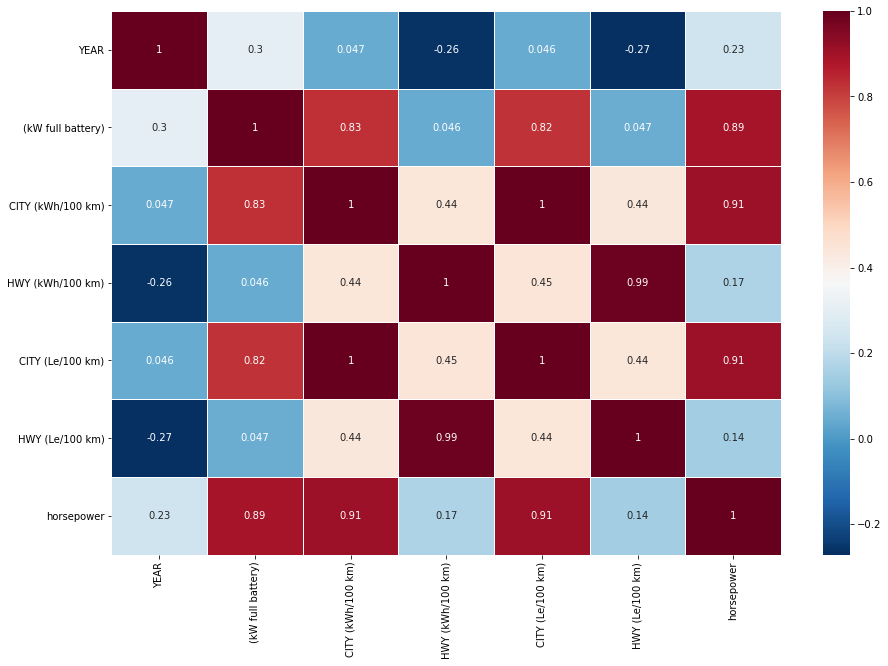

In [6]:
corr = dataset.corr(method='pearson')
#Pearson - Visual heatmap
fig, ax = plt.subplots(figsize=(15,10)) #for size of figure
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu_r', annot=True, linewidth=0.5, ax=ax)

The matrix above visualizes the pearson correlation between the variables in the dataset. Other correlation types include: 
- Spearman 
- Kendall 
- Gamma 
- Eta 
- **You can look up the different correlation types and how they differ on Google**

Another way to look for correlation is by plotting all the data 

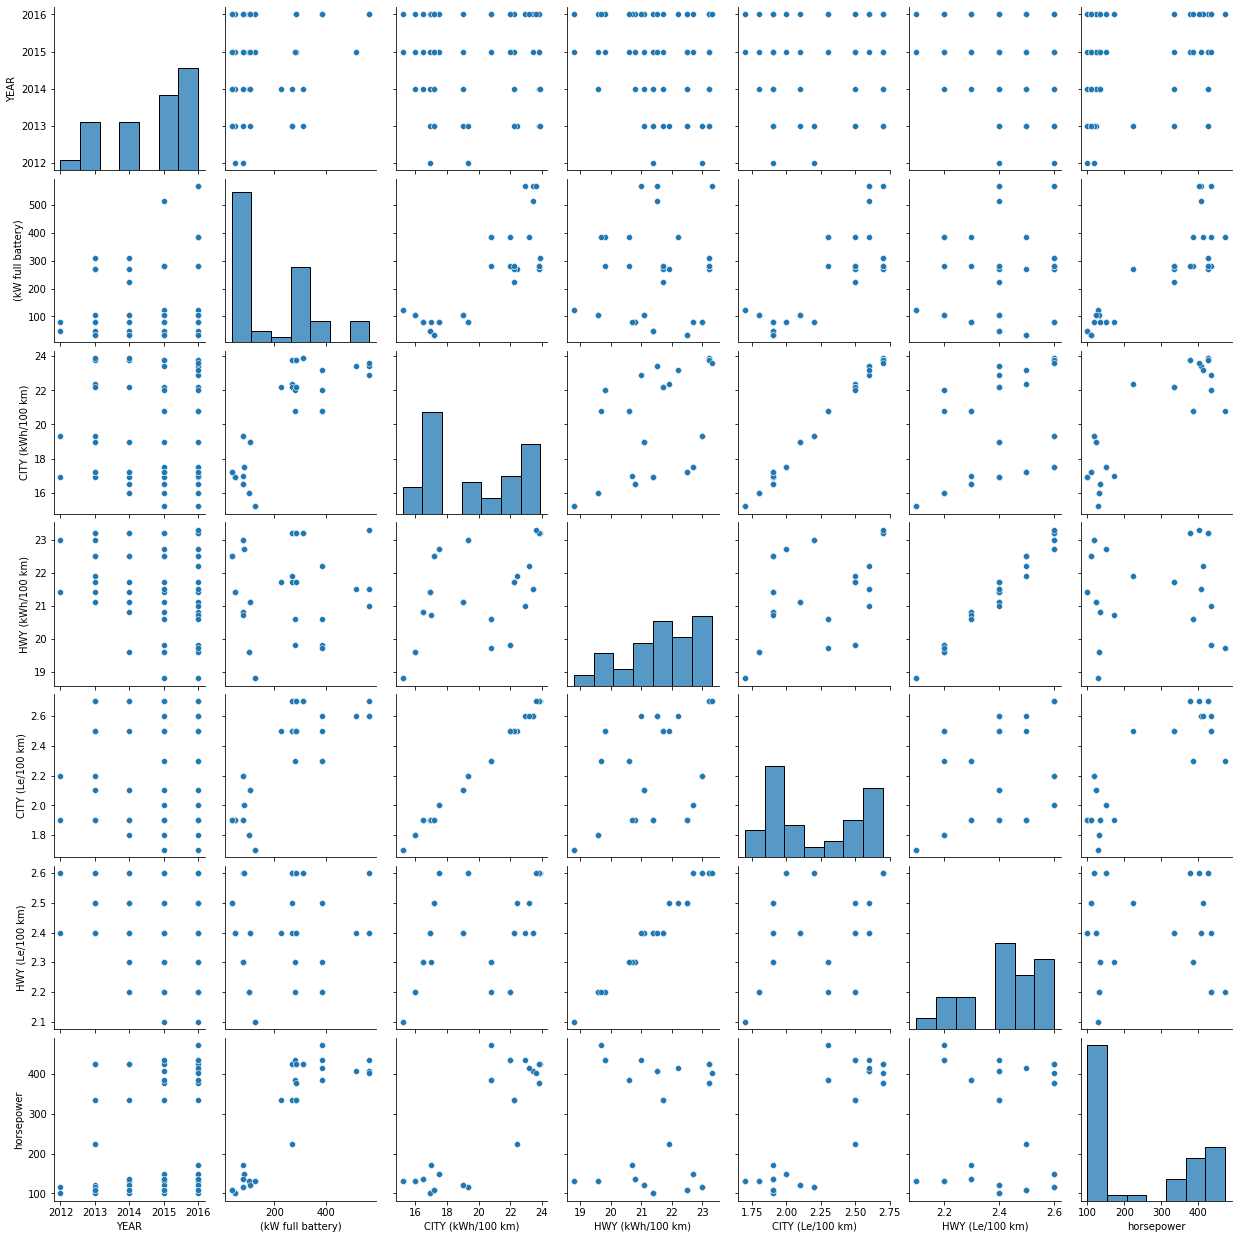

In [7]:
sns.pairplot(data=dataset) 

##### Question 1: 
I want to predict how many horsepowers the car has (horsepower is my target). Which variable would you choose as the feature?

In [14]:
#Create the feature and target vectors
X = dataset['(kW full battery)'].values.reshape(-1, 1)
y = dataset['horsepower'].values

In [15]:
X

array([[ 49],
       [ 80],
       [107],
       [ 49],
       [ 80],
       [ 35],
       [ 35],
       [270],
       [270],
       [270],
       [310],
       [104],
       [107],
       [ 49],
       [ 80],
       [ 35],
       [ 35],
       [225],
       [270],
       [310],
       [125],
       [104],
       [107],
       [ 81],
       [ 49],
       [ 80],
       [ 35],
       [ 35],
       [283],
       [283],
       [283],
       [280],
       [280],
       [515],
       [125],
       [104],
       [107],
       [ 81],
       [ 49],
       [ 80],
       [ 80],
       [ 35],
       [ 35],
       [283],
       [283],
       [283],
       [386],
       [386],
       [386],
       [568],
       [568],
       [386],
       [568]], dtype=int64)

##### Question 2: 
What are we trying to figure out when choosing (KW full battery) and horsepower as our X and y variables?

### 4. Create the model and fit it on the data

Libraries like sklearn are a gift when creating models. We call some methods and functions, and the underlying algoritms do the job for us. **However, we need to interpret these algorithms**. Instead of using a lot of time designing the algorithms from scratch each time we need them, we can concentrate on our own data-mining task. **Nonetheless, we must firmly rely on the documentation to know what each function expects and how to use them.**

In [10]:
#create an object from the model's class
model= LinearRegression()

Fit your model object on your data, which is the feature vectors (X) and the target vector (y)

In [11]:
#fit the model object on the training data
model.fit(X,y)

LinearRegression()

### 5. Calculate the coeficient for horsepower and visualize the model against the data

Coeficient in this case works as an indicator for the estimated **effect of increasing kW full battery by 1**

In [12]:
model.coef_

array([0.81350853])

##### Question 3: 
How do you think the line of the model is going to look based on the coeficient (going up or down)?

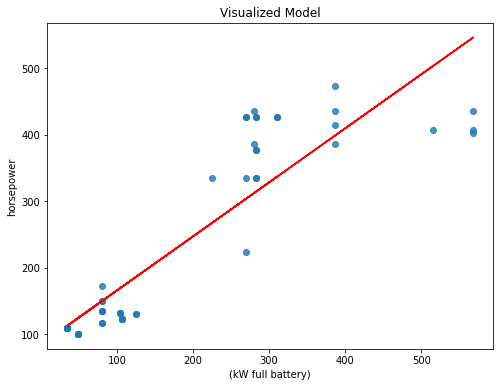

In [16]:
plt.figure(figsize=(8,6)) 

plt.scatter(x = dataset['(kW full battery)'], y = dataset['horsepower'], alpha = 0.8)
plt.plot(X, model.predict(X), color= 'red')

plt.title('Visualized Model')
plt.xlabel('(kW full battery)')
plt.ylabel('horsepower')

plt.show()

## <font color= green>Simple Linear Regression with statsmodels</font>

We are using the same data and creating the same models so we should get the same results. However, statsmodel makes us able to focus more on the underlying statistics of modeling

In [19]:
pip install statsmodels

  Using cached patsy-0.5.2-py2.py3-none-any.whl (233 kB)
Note: you may need to restart the kernel to use updated packages.


In [20]:
# Import statsmodels to dive into the statistical aspect of modeling
import statsmodels.api as sm
from scipy import stats

### 6. Ordinary Least Squares model

Ordinary Least Squares (OLS) creates the same model as Sklearn's LinearRegression(). Ordinary Least Squares fits a line on the data by using the **squared residuals**. 

In [21]:
# create the ols model and fit it on the train data
model_ols = sm.OLS(endog = y, exog = X).fit()

### 7. Residuals and fitted values

Residuals are the distance between the model's line and the data points the model was fitted on. Fitted values are the values predicted by the model for each data point

More information on residuals and fitted values:
- https://statisticsbyjim.com/glossary/residuals/
- https://statisticsbyjim.com/glossary/fitted-values/

In [23]:
# get the model's residuals
residuals = model_ols.resid

In [24]:
#get the fitted values 
fitted_values = model_ols.fittedvalues

Plot the relationship between the residuals and the fitted values through the **residplot()** function

C:\Users\ander\anaconda3\envs\BDP_EXERCISE\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


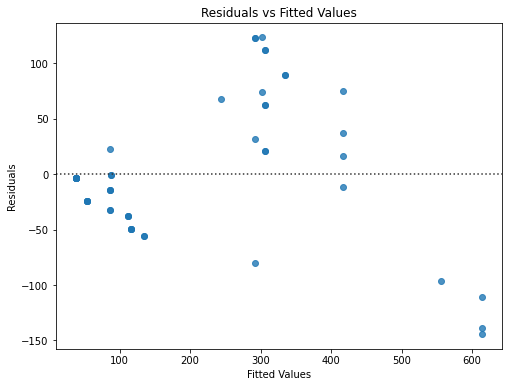

In [25]:
plt.figure(figsize=(8,6)) 

ax = sns.residplot(fitted_values, residuals)

ax.set_title('Residuals vs Fitted Values')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')

plt.show()

Calculate residual sum of squares

In [26]:
print(model_ols.ssr)

355753.49042941444


P value and nul hypothesis


In [19]:

print(model_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.911
Method:                 Least Squares   F-statistic:                              543.2
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                    3.44e-29
Time:                        16:02:50   Log-Likelihood:                         -308.71
No. Observations:                  53   AIC:                                      619.4
Df Residuals:                      52   BIC:                                      621.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Is this residual sum of squares too high? It is hard to say. For your project, you will have to find academic articles where the residual sum of squares is calculated and evaluate how they interpret their score. 

## <font color= green>Multiple Linear Regression</font>

Now we will create a multiple linear regression model with sklearn using (kW full battery) and CITY (Le/100 km) as feature (X) and target (y) stays the same (horsepower)

In [19]:
X_multiple= dataset[['(kW full battery)','CITY (Le/100 km)']].values

### <font color= orange>Overfitting</font>

One theorem in data science states, that **if someone looks hard enough, correlation(s) will be found.** 

This means that if we let our algorithms analyze the data deep enough it will always find patterns to fit. But these patterns are not general attributes of the data, but rather particular nuances in the data. **In short, we easily overfit a model on a dataset so we need another similar dataset to test our model on**

**Example:**

We have data on milk production between 1971-2000. We let our algorithm analyze this data and create a model. Then we would need to find data from for example 2001-2020 on milk production to test our model on in order to determine whether our model is able to predict the future trends in milk production

Since having two datasets from the same kind is seldom the case, the holdout dataset can help us dividing our single dataset into two separate part: 
- **training set** 
- **test set**

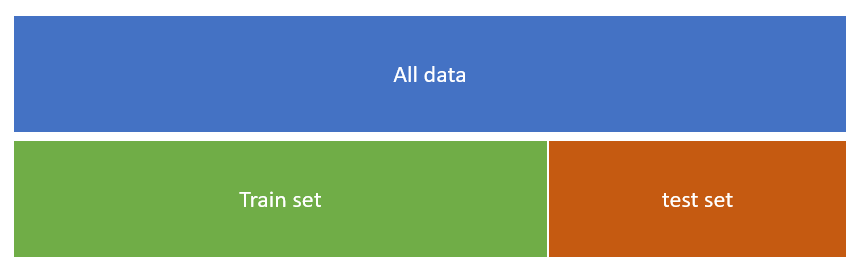

Split the data into a train sample and a test sample

In [20]:
X_train_multiple, X_test_multiple, y_train, y_test = train_test_split(X_multiple, y, test_size=0.25, random_state=0)

We need to split the data in order to avoid overfitting. Overfitting is what happens when the model you create performs really well when modeling your data, but will perform poorly when fed new data. Consequently, we need to split the data in train and test set and only fit the model on the train data. The test data will work as new data the model has never seen before.

Create a model from the object's class

In [21]:
model_multiple= LinearRegression()

Fit model object on the training data

In [22]:
model_multiple.fit(X_train_multiple,y_train)

LinearRegression()

Measure r^2 score on the test data

In [23]:
accuracy_test_multiple = round(model_multiple.score(X_test_multiple,y_test),4)
accuracy_test_multiple

0.8475

### 8. Example of overfitting

In [24]:
accuracy_test_multiple = round(model_multiple.score(X_train_multiple,y_train),4)
accuracy_test_multiple

0.9046

##### Question 4: 
Do you think that the R^2 score measured on the train set will be higher or lower than the R^2 score measured the test set? 

### 9. Plot the model against the data

##### Question 5:
Before we plot the model against the data, what do you think that the plot will look like?

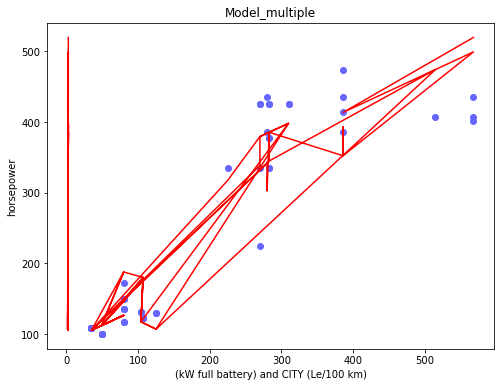

In [25]:
plt.figure(figsize=(8,6)) 

plt.scatter(X, y, color='#6666ff')
plt.plot(X_multiple, model_multiple.predict(X_multiple), color= 'red')

plt.title('Model_multiple')
plt.xlabel('(kW full battery) and CITY (Le/100 km)')
plt.ylabel('horsepower')

plt.show()

We cannot in a sensible way plot three dimensions in a two dimensional plot so we must in this case rely on our r^2 values to interpret the model

#### Exercise 1:

Create a linear regression model and fit it on your dataset

In [26]:
#Write your code here:


#### Exercise 2:
Measure r^2 score on the test data for your model

In [27]:
#Write your code here:


#### Exercise 3:
Visualize your model

In [28]:
#Write your code here:


#### Exercise 4:
Plot the relationship between the residuals and the fitted values for your model

In [ ]:
#Write your code here:


## <font color = green>That's it for today! Have a wonderful day. :)